<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S12_C3_CNN_Binary_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN

[CNN](https://poloclub.github.io/cnn-explainer/)

In [1]:
import os
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Parte 1. Cargar los Datos

In [2]:
if(os.path.exists("pizza_steak")):
  print("Files already exist")
else:
  !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

  zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
  zip_ref.extractall()
  zip_ref.close()
  !rm pizza_steak.zip

Files already exist


In [3]:
!ls pizza_steak/

test  train


# Parte 2. Inspeccionar los dastos

In [4]:
!pip install utils

In [5]:
import pathlib
import numpy as np
import random

In [6]:
from utils import *

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [9]:
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [10]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


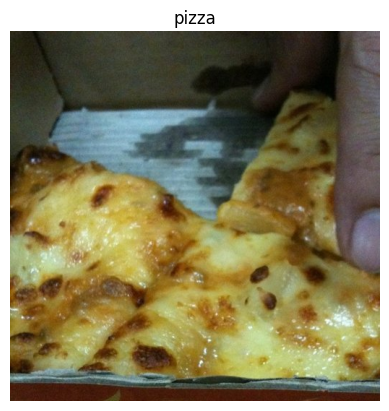

In [11]:
random_class = random.choice(class_names)
img = view_random_image(target_dir="pizza_steak/train/", target_class=random_class)

In [12]:
# Results Dictionary
all_results = {
    "models" : ["model_1", "model_2", "model_3", "model_4"],
    "acc" : [],
    "loss" : [],
}

# Parte 3.Preprosesamiento

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [15]:
train_generator = ImageDataGenerator(rescale=1/255., validation_split=0.2)
test_generator = ImageDataGenerator(rescale=1/255.)

In [16]:
train_data = train_generator.flow_from_directory(
    directory = train_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes para poder usar 2D
    class_mode = "binary", # Calses binarias
    seed = 42, # Semilla asegura la reproducibilidad
    batch_size = 32, # Tamaño del batch
    subset = "training" # Subconjunto de entrenamiento
)

valid_data = train_generator.flow_from_directory(
    directory = train_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes
    class_mode = "binary", # Calses binarias
    batch_size = 32, # Tamaño del batch
    seed = 42, # Semilla
    shuffle = False,
    subset = "validation" # Subconjunto de entrenamiento
)

test_data = train_generator.flow_from_directory(
    directory = test_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes
    class_mode = "binary", # Calses binarias
    seed = 42, # Semilla
    batch_size = 32, # Tamaño del batch
    shuffle = False,
)

Found 1200 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [17]:
images, labels = next(train_data)

(224, 224, 3)


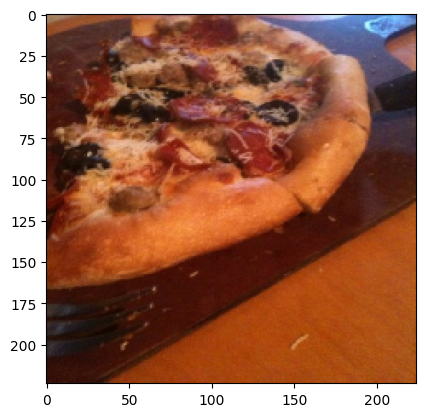

In [18]:
imgs = 20
print(images[imgs].shape)
plt.imshow(images[imgs])

# Parte 4.A. Crear el modelo

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [20]:
model_1 = Sequential([
    Conv2D(filters=10, kernel_size=3, padding="valid", activation="relu", input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Flatten(),
    Dense(units=1, activation="sigmoid")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 216, 216, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 466560)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         466,561 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 469,571 (1.79 MB)

 Trainable params: 469,571 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model_1.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

# Parte 4.B. Entrenar el modelo



In [23]:
import numpy as np

In [24]:
batch_size = 32
history_1 = model_1.fit(train_data,
                        epochs=6,
                        #steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        #validation_steps=len(valid
                        verbose = 1)

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 361ms/step - accuracy: 0.5385 - loss: 0.8497 - val_accuracy: 0.7567 - val_loss: 0.5376
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.7992 - loss: 0.4337 - val_accuracy: 0.7600 - val_loss: 0.5323
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.8863 - loss: 0.3091 - val_accuracy: 0.7433 - val_loss: 0.6466
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.9430 - loss: 0.1771 - val_accuracy: 0.7400 - val_loss: 0.7091
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9795 - loss: 0.0697 - val_accuracy: 0.7133 - val_loss: 0.8673
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.9967 - loss: 0.0301 - val_accuracy: 0.7500 - val_loss: 0.9342


In [25]:
history_uno = model_1.fit(train_data,
                        epochs=6,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        verbose=1)

Epoch 1/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.9984 - loss: 0.0085 - val_accuracy: 0.7333 - val_loss: 1.1236
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/6


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.7233 - val_loss: 1.3294
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 1.0000 - loss: 8.6704e-04 - val_accuracy: 0.7333 - val_loss: 1.3476
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [26]:
# Número de lotes
1200/32

37.5

# Parte 4.C. probar el modelo

In [27]:
scores_1 = model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - accuracy: 0.8274 - loss: 0.5856


In [28]:
def plot_train_curves(history):
  plt.figure(figsize=(12,2))
  plt.subplot(1,2,1)
  plt.plot(history.history["accuracy"], label="accuracy")
  plt.plot(history.history["val_accuracy"], label="val_accuracy")
  plt.title("Training and Validation and Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()


  plt.figure(figsize=(12,2))
  plt.subplot(1,2,2)
  plt.plot(history.history["loss"], label="loss")
  plt.plot(history.history["val_loss"], label="val_loss")
  plt.title("Training and Validation and Lossy")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.8274 - loss: 0.5856


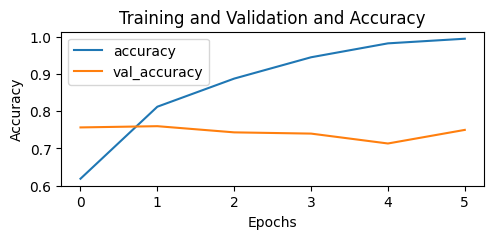

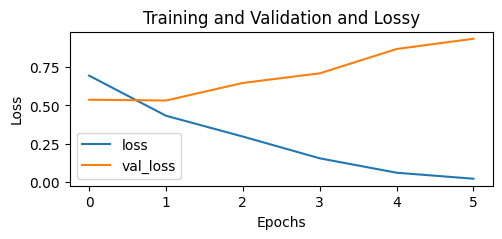

In [29]:
scores_1 = model_1.evaluate(test_data)
plot_train_curves(history_1)

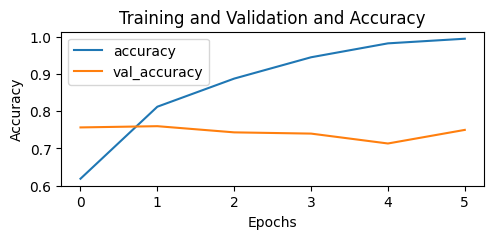

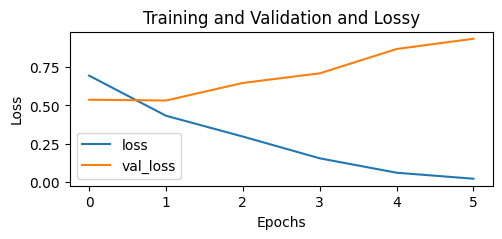

In [30]:
plot_train_curves(history_1)

El rendimiento del entrenamiento es escelente es casi una exactitud/accuracy de 100%

El rendimiento de la validacion es muy bajoa al final es del 70%

Esto es una muestra que el modelo se sobreajusto(overfiting)

**Que hacer para disminuir el sobreajuste**

* Aumentar los datos
* Regularizacion (pooling, dropout)
* Disminuirla complejidad del modelo (en este caso 4 capas convolucionales secuenciales)

# Parte 5.A. Crear modelo 2

In [31]:
model_2 = Sequential([
    Conv2D(filters=10, kernel_size=3, input_shape=(224, 224, 3), padding="valid", activation="relu"),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPooling2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPooling2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Flatten(),
    Dense(units=1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

# Parte 5.B. Entrenar modelo 2

In [32]:
batch_size = 32
history_2 = model_2.fit(train_data,
                        epochs=6,
                        #steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        #validation_steps=len(valid
                        verbose = 1)

Epoch 1/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - accuracy: 0.5620 - loss: 0.6745 - val_accuracy: 0.7100 - val_loss: 0.5889
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.7557 - loss: 0.5150 - val_accuracy: 0.7367 - val_loss: 0.5682
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.8074 - loss: 0.4580 - val_accuracy: 0.7333 - val_loss: 0.5269
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.8072 - loss: 0.4221 - val_accuracy: 0.7767 - val_loss: 0.4960
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.8237 - loss: 0.3974 - val_accuracy: 0.7767 - val_loss: 0.5246
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.8228 - loss: 0.3777 - val_accuracy: 0.7667 - val_loss: 0.5076


% Parte 5.C Probar el modelo

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.9027 - loss: 0.2735


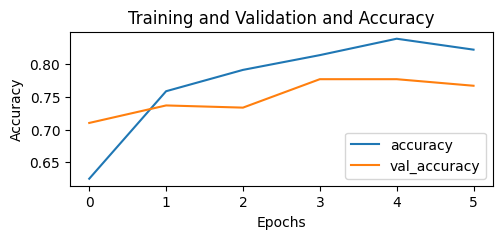

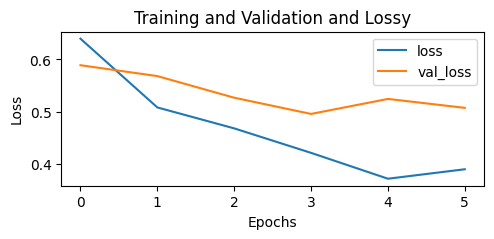

In [33]:
scores_2 = model_2.evaluate(test_data)
plot_train_curves(history_2)

In [34]:
from tensorflow.keras.layers import AveragePooling2D

In [35]:
model_3 = Sequential([
    Conv2D(filters=10, kernel_size=3, input_shape=(224, 224, 3), padding="valid", activation="relu"),
    AveragePooling2D(pool_size=2),  # Tamaño del pool es 2x2
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    AveragePooling2D(pool_size=2),  # Especificamos el pool_size nuevamente
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    AveragePooling2D(pool_size=2),  # Especificamos el pool_size nuevamente
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Flatten(),
    Dense(units=1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [36]:
batch_size = 32
history_3 = model_3.fit(train_data,
                        epochs=6,
                        #steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        #validation_steps=len(valid
                        verbose = 1)

Epoch 1/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.6181 - loss: 0.6368 - val_accuracy: 0.7233 - val_loss: 0.6272
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.7809 - loss: 0.4884 - val_accuracy: 0.7533 - val_loss: 0.5276
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.7893 - loss: 0.4500 - val_accuracy: 0.7633 - val_loss: 0.5033
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.8033 - loss: 0.4407 - val_accuracy: 0.7467 - val_loss: 0.4962
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.8464 - loss: 0.3778 - val_accuracy: 0.7567 - val_loss: 0.4950
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.8430 - loss: 0.3620 - val_accuracy: 0.7800 - val_loss: 0.4836


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.8450 - loss: 0.3534


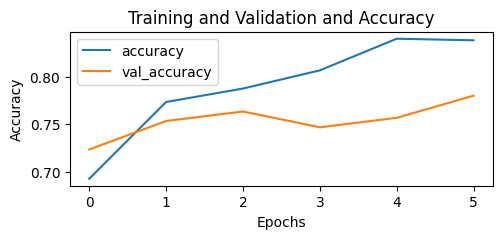

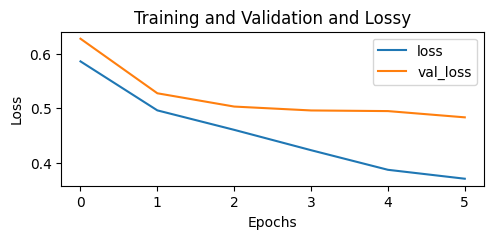

In [37]:
scores_3 = model_3.evaluate(test_data)
plot_train_curves(history_3)

In [38]:
from tensorflow.keras.layers import GlobalAveragePooling2D

In [39]:
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3, input_shape=(224, 224, 3), padding="valid", activation="relu"),
    AveragePooling2D(pool_size=2),  # Tamaño del pool es 2x2
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    AveragePooling2D(pool_size=2),  # Especificamos el pool_size nuevamente
    Conv2D(filters=20, kernel_size=3, activation="relu"),
    AveragePooling2D(pool_size=2),  # Especificamos el pool_size nuevamente
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Flatten(),
    Dense(units=1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [40]:
batch_size = 32
history_4 = model_4.fit(train_data,
                        epochs=6,
                        #steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        #validation_steps=len(valid
                        verbose = 1)

Epoch 1/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - accuracy: 0.6336 - loss: 0.6450 - val_accuracy: 0.7300 - val_loss: 0.6488
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.7653 - loss: 0.5145 - val_accuracy: 0.7967 - val_loss: 0.4814
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.7890 - loss: 0.4587 - val_accuracy: 0.7333 - val_loss: 0.6047
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.8146 - loss: 0.4061 - val_accuracy: 0.7400 - val_loss: 0.5450
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.8193 - loss: 0.3959 - val_accuracy: 0.7600 - val_loss: 0.5018
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.8618 - loss: 0.3369 - val_accuracy: 0.8033 - val_loss: 0.4776


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.8059 - loss: 0.4079


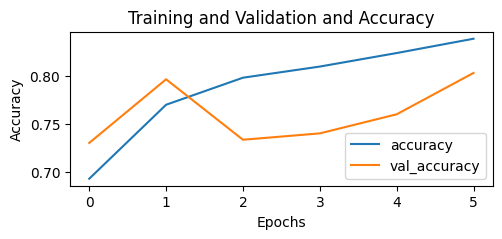

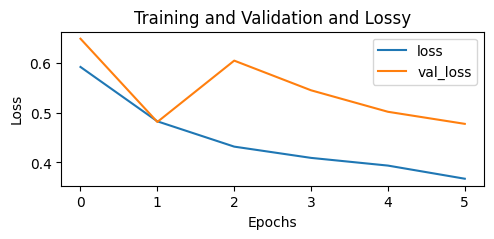

In [41]:
scores_4 = model_4.evaluate(test_data)
plot_train_curves(history_4)

In [42]:
model_5 = Sequential([
    Conv2D(filters=10, kernel_size=3, input_shape=(224, 224, 3), padding="valid", activation="relu"),
    AveragePooling2D(pool_size=2),  # Tamaño del pool es 2x2
    Conv2D(filters=20, kernel_size=3, activation="relu"),
    AveragePooling2D(pool_size=2),  # Especificamos el pool_size nuevamente
    Conv2D(filters=40, kernel_size=3, activation="relu"),
    AveragePooling2D(pool_size=2),  # Especificamos el pool_size nuevamente
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Flatten(),
    Dense(units=1, activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [43]:
batch_size = 32
history_5 = model_5.fit(train_data,
                        epochs=6,
                        #steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        #validation_steps=len(valid
                        verbose = 1)

Epoch 1/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 204ms/step - accuracy: 0.5215 - loss: 0.6958 - val_accuracy: 0.7467 - val_loss: 0.5504
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.7535 - loss: 0.5396 - val_accuracy: 0.7367 - val_loss: 0.5343
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.7942 - loss: 0.4593 - val_accuracy: 0.8000 - val_loss: 0.4709
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.8279 - loss: 0.4017 - val_accuracy: 0.7400 - val_loss: 0.5216
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.7992 - loss: 0.4091 - val_accuracy: 0.7733 - val_loss: 0.4969
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.8297 - loss: 0.3867 - val_accuracy: 0.7667 - val_loss: 0.4775


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.8373 - loss: 0.3965


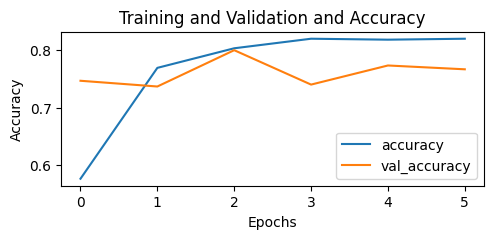

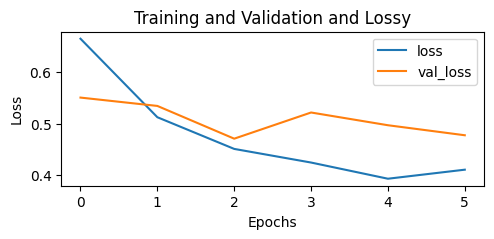

In [44]:
scores_5 = model_5.evaluate(test_data)
plot_train_curves(history_5)

# Parte 3.B. Reducir el sobreajuste con Data Augmentation

Data augmentation: es una tecnica que aumenta el numero de entrenamiento

* Rotar la imagen
* Inclinar la imagen
* Zoom
* Desplazar horizontal
* Desplazar vertical
* Voltear
* Rellenar pixeles vacios

In [67]:
# Generar imagenes aunmentadas
train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.2, # Rotar la imagen con un rango de 20%
    shear_range = 0.2, # Inclinación de la imagen
    zoom_range = 0.2, # Zoom
    width_shift_range = 0.2, # Desplazamiento horizontal
    height_shift_range = 0.2, # Desplazamiento vertical
    horizontal_flip = True, # Voltear horizontalmente
    fill_mode = "reflect", # Rellenar pixeles vacios
    validation_split = 0.2
)

# Generar imagener sin aumentar
train_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)

In [75]:

# Importar los datos y aplicar el ImageDataGenerator

train_data_augmented  = train_datagen_augmented.flow_from_directory(
    directory = train_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes cuadradas para poder usar Conv2D
    class_mode = "binary", # Clases binarias
    seed = 42, # Semilla que asegura la reproducibilidad
    batch_size = 32, # Tamaño del batch
    subset = "training" # Subconjunto de entrenamiento
)

train_data_2 = train_datagen.flow_from_directory(
    directory = train_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes cuadradas para poder usar Conv2D
    class_mode = "binary", # Clases binarias
    seed = 42, # Semilla que asegura la reproducibilidad
    batch_size = 32, # Tamaño del batch
    subset = "training" # Subconjunto de entrenamiento
)



Found 1200 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [76]:
images, labels = next(train_data_2)
images_aug, labels_aug = next(train_data_augmented)

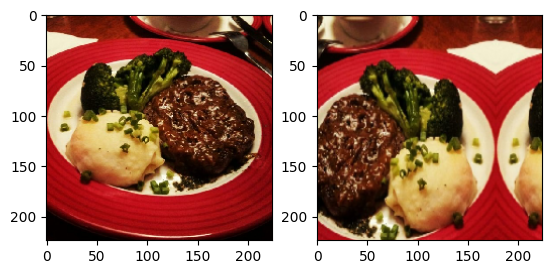

In [77]:
import random

random_img = random.randint(0,31)
plt.subplot(1,2,1)
plt.imshow(images[random_img])
plt.subplot(1,2,2)
plt.imshow(images_aug[random_img])

In [78]:
valid_data_augmented  = train_datagen_augmented.flow_from_directory(
    directory = train_dir, # Directorio de los datos de entrenamiento
    target_size = (224,224), # Tamaño de las imagenes
    class_mode = "binary", # Clases binarias
    batch_size = 32, # Tamaño del batch
    seed = 42, # Semilla
    shuffle = False, #
    subset = "validation" # Subconjunto de validación
)

Found 300 images belonging to 2 classes.


# Parte 6.A. Crear modelo3 (el mismo modle_2)

# Parte 6.B. Entrenar el modelo

In [79]:
MaxPool2D = MaxPooling2D

In [80]:

model_3 = Sequential([Conv2D(filters=10, kernel_size=3, input_shape=(224,224,3), padding = 'valid', activation="relu"),
                      MaxPool2D(pool_size=2),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      MaxPool2D(),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(units=1, activation="sigmoid")])

model_3.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

batch_size = 32
history_3 = model_3.fit(train_data_augmented,
                        epochs=6,
                        validation_data=valid_data_augmented,
                        verbose = 1)

Epoch 1/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 474ms/step - accuracy: 0.5282 - loss: 0.7042 - val_accuracy: 0.6967 - val_loss: 0.5915
Epoch 2/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 469ms/step - accuracy: 0.6809 - loss: 0.5903 - val_accuracy: 0.6633 - val_loss: 0.6410
Epoch 3/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 422ms/step - accuracy: 0.7268 - loss: 0.5546 - val_accuracy: 0.7267 - val_loss: 0.5789
Epoch 4/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 443ms/step - accuracy: 0.7366 - loss: 0.5284 - val_accuracy: 0.7633 - val_loss: 0.5044
Epoch 5/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 429ms/step - accuracy: 0.7504 - loss: 0.5187 - val_accuracy: 0.7667 - val_loss: 0.4935
Epoch 6/6
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 449ms/step - accuracy: 0.7665 - loss: 0.5043 - val_accuracy: 0.7467 - val_loss: 0.5362


# Parte 6.C. probar el modelo

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.8730 - loss: 0.3159


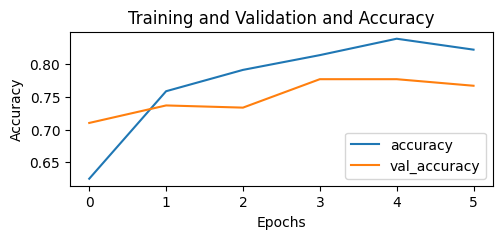

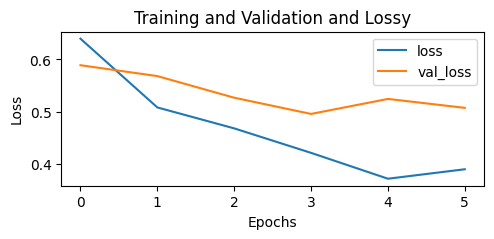

In [81]:
scores_3  = model_3.evaluate(test_data)
plot_train_curves(history_3)

* Experimento 1. 4 capas convolucionales  Data: Original Diferencia(train-valid): 26-30%
* Experimento 2. (conv2D+Maxpool)x3  Data: Original Original Diferencia(train-valid): 7-9%
* Experimento 3. (conv2D+Maxpool)x3  Data: Original Augmentada Diferencia(train-valid): 1-2% (accuracy esta en 76%)

Opciones para seguir mejorando

* Aumentar capas convolucionales
* Aumentar filtros en las capas convolucionales
* Agregar mas capas densas
* Aumentar Epocas
* Modificar el compilador de la red (tasas de aprendizaje, adam: tasa de aprendizaje ajustable)

# Parte 7.A.B Crear y entrenar el modelo

Experimento 4: VGG" Data: Augmentada

In [1]:
model_4 = Sequential([Conv2D(filters=10, kernel_size=3, input_shape=(224,224,3), padding = 'valid', activation="relu"),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      MaxPool2D(),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      Conv2D(filters=10, kernel_size=3,  activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(units=1, activation="sigmoid")])

model_4.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

batch_size = 32
history_4 = model_4.fit(train_data_augmented,
                        epochs=6,
                        validation_data=valid_data_augmented,
                        verbose = 1)

NameError: name 'Sequential' is not defined

In [ ]:
scores_4  = model_4.evaluate(test_data)
plot_train_curves(history_4)

In [ ]:
history_5 = model_4.fit(train_data_augmented,
                        epochs=10,
                        validation_data=valid_data_augmented,
                        verbose = 1)

In [ ]:
scores_5  = model_4.evaluate(test_data)
plot_train_curves(history_5)